# Assignment 6: Nearest Neighbour and Artificial Neural Networks

## Objective of this assignment
The objective of this exercise is to understand how k-nearest neighbor and neural networks can be used to solve classification problems.
## ** Important: ** When handing in your homework:
+ Hand in the notebook **(and nothing else)** named as follows: **StudentName1_snumber_StudentName2_snumber.ipynb**
+ Provide clear and complete answers to the questions below under a separate header (not hidden somewhere in your source code), and make sure to explain your answers / motivate your choices. Add Markdown cells where necessary.
+ Source code, output graphs, derivations, etc., should be included in the notebook.
+ Hand-in: upload to Brightspace.
+ Include name, student number, assignment (especially in filenames)!
+ When working in pairs only one of you should upload the assignment, and report the name of your partner in your filename.
+ Use the Brightspace discussion board or email the student assistants for questions on how to complete the exercises.
+ If you find mistakes/have suggestions/would like to complain about the assigment material itself, please email me [Lisa] at `l.tostrams@science.ru.nl`


## Advised Reading and Exercise Material
**The following reading material is recommended:**

- Pang-Ning Tan, Michael Steinbach, and Vipin Kumar, *Introduction to Data Mining*, section 5.2-5.4.


## Additional Tools
For this exercise you will need to load the provided *MLPPlot.py* script.

This exercise is based upon material kindly provided by the Cognitive System Section, DTU Compute, http://cogsys.compute.dtu.dk. Any sale or commercial distribution is strictly forbidden.


##  6.1 K-nearest neighbor classification
In this exercise we will use the k-nearest neighbors (KNN) method for classification.
First, we will consider the four synthetic data sets synth1, synth2, synth3 and
synth4 we used in earlier assignments.

#### 6.1.1 (2 points)
For each of the four synthetic data sets, do the following. Load the complete dataset `X` and examine it by making a scatter plot, coloring the points by their class in `y`. Don't forget to add a legend. Classify the data `X` using the k-nearest neighbor classifier `KNeighborsClassifier` from `sklearn.neighbors` (http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). Choose a suitable distance measure (you should consider the distance measures `euclidean` and `cityblock`). Choose a suitable number of neighbors. Make another scatterplot of the new classification (with the best k-value and distance measures you found -- just one plot per data set is fine). Create the confusion matrix, plot it using the function given below, and calculate the accuracy and error rate from these numbers.

*Hints: To generate a confusion matrix, you can use the function confusion_matrix() from the module sklearn.metrics. You can use the function below to plot the confusion matrix. Don't remember how to read a confusion matrix? Check the wiki page: https://en.wikipedia.org/wiki/Confusion_matrix*

Which distance measures worked best for each of the four problems? Can you explain why? How many neighbors were needed for the four problems? Can you give
an example of when it would be good to use a large/small number of neighbors?
Consider e.g. when clusters are well separated versus when they are overlapping.


In [1]:
import seaborn as sn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm,y, data_name):
    "Plots confusion matrix cm using label vector y" 
    df_cm = pd.DataFrame(cm, index = [i+1 for i in np.unique(y)],
                  columns = [i+1 for i in np.unique(y)])
    plt.figure()
    sn.heatmap(df_cm, annot=True)
    plt.title(f'Confusion matrix of {data_name}')
    plt.xlabel('Predicted class')
    plt.ylabel('Actual class')
    plt.show()

In [2]:
# Load the complete dataset X and 
# examine it by making a scatter plot, coloring the points by their class in y.
from scipy.io import loadmat

synth_names = [f'Data/synth{i}' for i in range(1, 5)]
synths = [loadmat(synth_name) for synth_name in synth_names]
pd.DataFrame(synths[0]['X']).head()

,0,1
0,0.418193,0.725060
1,1.160776,1.253722
2,0.991951,0.573326
3,1.059111,1.143922
4,0.866616,1.143537


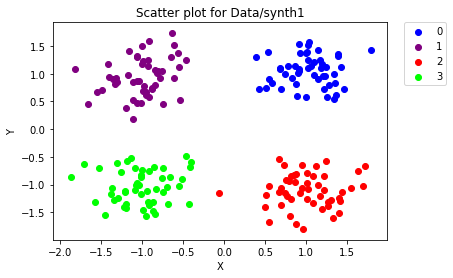

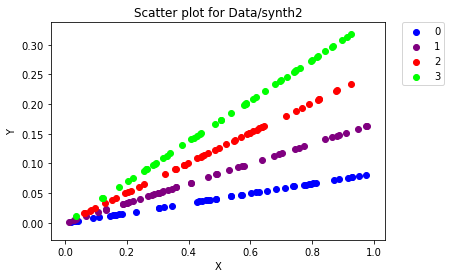

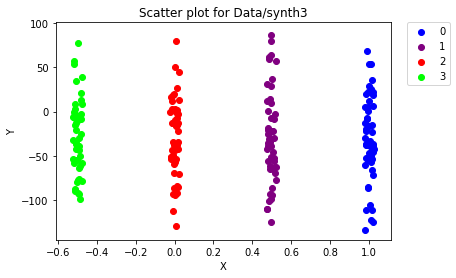

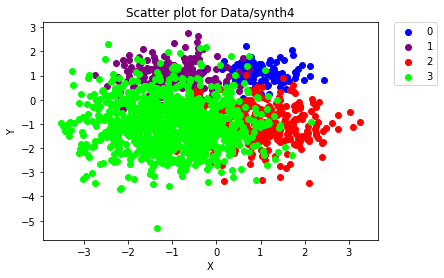

In [3]:
def clusterPlot(data, labels, data_name, colors=None, title=None):
    colors = ['blue', 'purple', 'red', 'lime']
    x1 =data['X'][:,0]
    x2 =data['X'][:,1]
    for label in np.unique(labels):
        x = x1[labels == label]
        y = x2[labels == label]
        plt.scatter(x, y, c=colors[label])
    plt.legend(np.unique(labels), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('X')
    plt.ylabel('Y')
    if title == None:
        plt.title(f'Scatter plot for {data_name}')
    else:
        plt.title(title)
    plt.show()
    
for synth, synth_name in zip(synths, synth_names):
    clusterPlot(synth, synth['y'].ravel(), synth_name)

## Helper functions

In [4]:
from sklearn.neighbors import KNeighborsClassifier

def KNeighbors(k, data, metric):
    estimator = KNeighborsClassifier(n_neighbors=k, metric=metric)
    estimator.fit(data['X'], data['y'].ravel())
    return estimator.predict(data['X'])

def KNeighbors_plot(k, data, data_name, metric="cityblock"):
    labels = KNeighbors(k, data, metric)
    title = f'{k}-Neighbors clustering: {data_name} using : {metric}'
    clusterPlot(data, labels, data_name, title = title)
    plt.show()
    

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

def cm_plot(k, data, data_name, metric='cityblock'):
    y_pred = KNeighbors(k, data, metric)
    y_true = data['y'].ravel()
    cm = confusion_matrix(y_true,y_pred)
    plot_confusion_matrix(cm, data['y'], data_name)
    acc = accuracy_score(y_true, y_pred)
    print(f'Accuracy : {100*acc} %')

## Analysis for each data set

### Synth 1

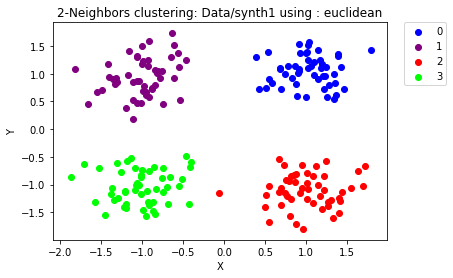

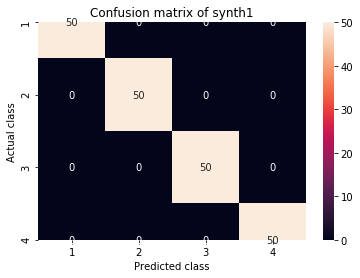

Accuracy : 100.0 %


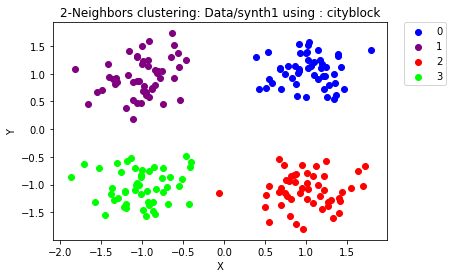

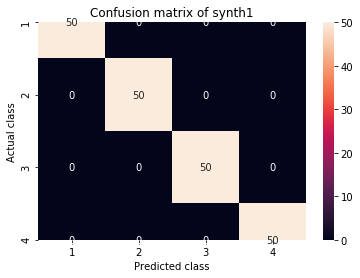

Accuracy : 100.0 %


In [15]:
k = 2
n = 0
metrics = ["euclidean", "cityblock"]

for metric in metrics:
    KNeighbors_plot(k, synths[n], synth_names[n], metric)
    cm_plot(k, synths[n], synth_names[n].split('/')[1], metric)

### Synth 2

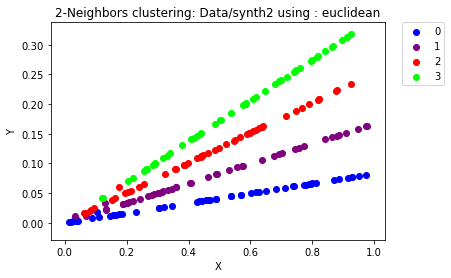

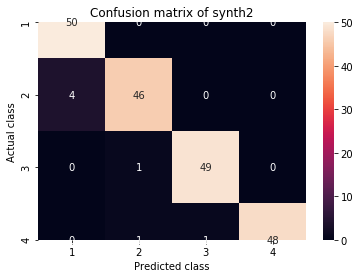

Accuracy : 96.5 %


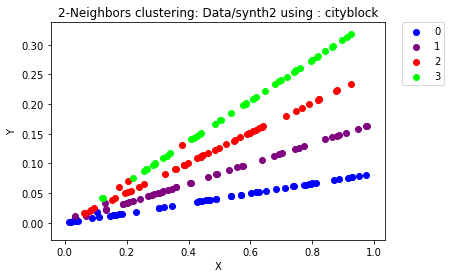

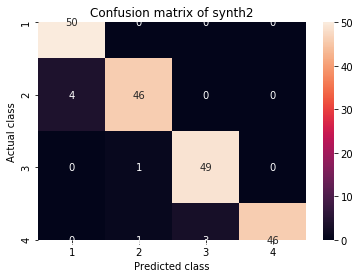

Accuracy : 95.5 %


In [24]:
k = 2
n = 1
metrics = ["euclidean", "cityblock"]

for metric in metrics:
    KNeighbors_plot(k, synths[n], synth_names[n], metric)
    cm_plot(k, synths[n], synth_names[n].split('/')[1], metric)

### Synth 3

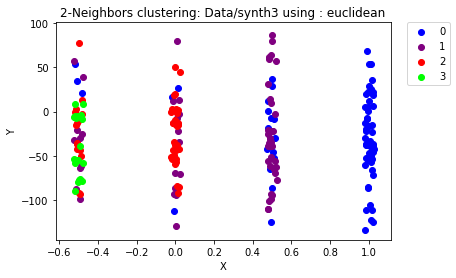

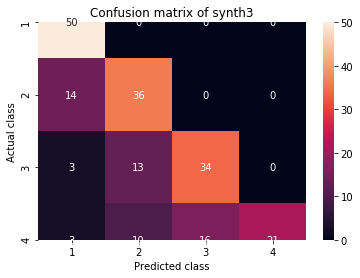

Accuracy : 70.5 %


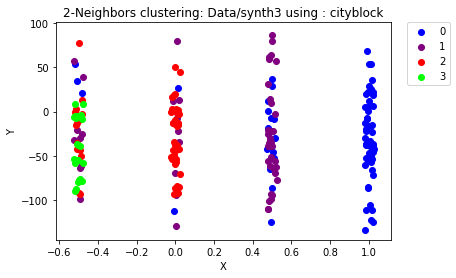

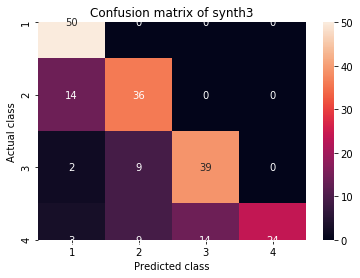

Accuracy : 74.5 %


In [30]:
k = 2
n = 2
metrics = ["euclidean", "cityblock"]

for metric in metrics:
    KNeighbors_plot(k, synths[n], synth_names[n], metric)
    cm_plot(k, synths[n], synth_names[n].split('/')[1], metric)

### Synth 4

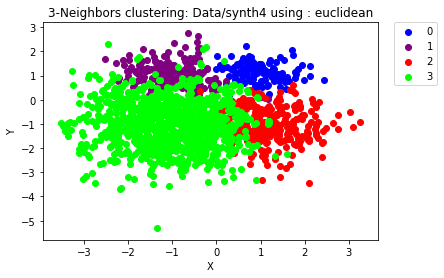

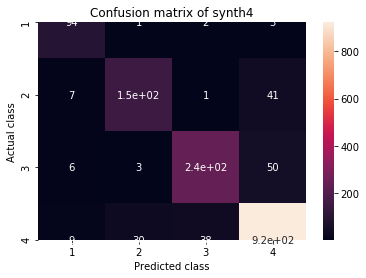

Accuracy : 88.0625 %


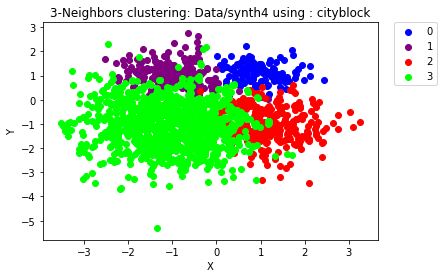

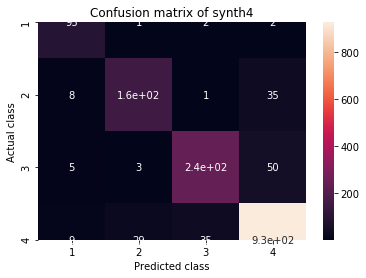

Accuracy : 88.75 %


In [39]:
k = 3
n = 3
metrics = ["euclidean", "cityblock"]

for metric in metrics:
    KNeighbors_plot(k, synths[n], synth_names[n], metric)
    cm_plot(k, synths[n], synth_names[n].split('/')[1], metric)

## Answer for 6.1.1 :

 
After running some experiments we found the following:

* **Synth 1**: both distance metrics give a good performance as it can be seen how the groups are clearly separated. By using k=2 we get 100% accuracy using both metrics.

* **Synth 2**: At k=2, `euclidean` distance performed slightly better. Later on, using k > 2, as clusters are spread out diaonally, `Manhattan or cityblock` distance  performed better as it measure the absolute distance between points.

* **Synth 3**: `cityblock` performed better as it measure the absolute distance between points and the structure of this dataset is that all groups are spead out over vertically.  At k =2 we got the highest accuracy. 

* **Synth 4**: At k =3 we got the best accuracy. In which, `cityblock` distance perform slightly better. In general, both distances performce slightly the same as the data is spread out over both axis. However, I would have expected to get better results using `Euclidean` distance but becuase it seems that as the clusters are very dense (full of data points) `cityblock` works pretty well too.

*Can you give an example of when it would be good to use a large/small number of neighbors? Consider e.g. when clusters are well separated versus when they are overlapping*.

Based on previous experiments, we can say that a small number of neighbors should be used when clusters are well separated as it the data manifold depends on the conectivity among the datapoints in each clusters, less neighbors are needed. In contrast, when clusters are overlapping, a large number of neighbors is needed to emphasis the density of each cluster by using more nieghbors.

#### 6.1.2 (1 points)
In general we can use cross-validation to select the optimal distance metric and
number of nearest neighbors k although this can be computationally expensive. We now return to the Iris data that we have considered in previous exercises, and will attempt to classify the Iris flowers using KNN. Load the Iris data into Python with the `pandas` function `read_excel()`. Inspect the data by printing the `head()`. Use the values of the 4 variables `Sepal Length,  Sepal Width,  Petal Length,  Petal Width` to create a data set `X`. Use the `Type` column to create the labels `y`. Use leave-one-out cross-validation to estimate the number of neighbors, k, for the k-nearest neighbor classifier. Plot the cross-validation average classification error as a function of k for $k = 1,..,40$.

You can use the function `LeaveOneOut` from `sklearn.model_selection`: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html

What is the optimal number of neighbors to use for this data?

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from tqdm.notebook import trange
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
iris = pd.read_excel('Data/iris.xls')
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
iris_data = iris.iloc[:, :4].to_numpy()
print(f'iris data: {iris_data.shape}, {iris_data.dtype}')

iris data: (150, 4), float64


In [24]:
iris_possible_labels = list(set(iris.iloc[:, -1]))
print(f'possible labels: {iris_possible_labels}')
iris_labels = np.array([iris_possible_labels.index(row['Type']) for index, row in iris.iterrows()])
print(f'iris labels: {iris_labels.shape}, {iris_labels.dtype}')

possible labels: ['Iris-setosa', 'Iris-virginica', 'Iris-versicolor']
iris labels: (150,), int64


In [27]:
def eval_knn(data, labels, k):
    correctness = []
    for train_ids, test_ids in LeaveOneOut().split(data):
        classifier = KNeighborsClassifier(k)
        classifier.fit(data[train_ids], labels[train_ids])
        test_predictions = classifier.predict(data[test_ids])
        correctness.append(test_predictions == labels[test_ids])
    return np.mean(correctness)

In [32]:
accuracies = []
for k in trange(1, 40):
    accuracies.append(eval_knn(iris_data, iris_labels, k))

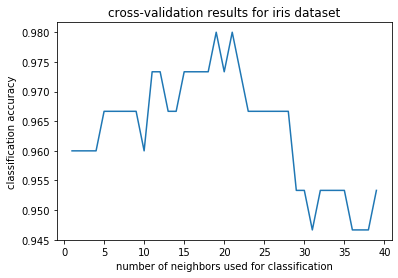

In [35]:
plt.title('cross-validation results for iris dataset')
plt.plot(np.arange(1, 40), accuracies)
plt.xlabel('number of neighbors used for classification')
plt.ylabel('classification accuracy')
plt.show()

_It seems to be best to use 20-ish neighbors._

#### 6.1.3 (2 points)

KNN can also be used for regression by predicting the output of an observation
as the average of the output values of its nearest neighbors. Predict the alcohol content of wine in the `Wine` data with KNN, using the other 10 attributes as predictors (ie. 'nearest' is based on those 10 other attributes). Plot the mean squared error of the predictions compared to the actual alcohol content as a function of the number of nearest neighbors k for $k = 1,..,40$. What is the optimal value for the number of nearest neighbors?

Perform the regression on all observations; no need to do cross-validation here. 

*Hints: Use the `NearestNeighbors` class and the function `kneighbors()` to find the nearest neighbors -- check the doc and read what this function does.*
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html

*Make a matrix `X` containing the first 10 attributes, and a vector `alcohol` containing the 11th attribute. Fit `X`, and get indices of the 41 nearest neighbors from the `kneigbors()` function. Use these indices to create an Nx41 matrix containing the alcohol values of the 40 closest neigbors for each of the N wines.*

*Predict each observation as the mean of the alcohol content of its k nearest neighbors. Make sure you don't include the value for the observation itself!*

In [43]:
from scipy.io import loadmat
import numpy as np
from sklearn.neighbors import NearestNeighbors
from tqdm.notebook import trange
%matplotlib inline
import matplotlib.pyplot as plt

In [17]:
wine = loadmat('Data/wine.mat')
wine_columns = [column[0] for column in wine['attributeNames'][0]]
wine = pd.DataFrame(data=wine['X'], columns=wine_columns)
wine.head()

,Fixed acidity,Volatile acidity,Citric acid,Residual sugar,Chlorides,Free sulfur dioxide,Total sulfur dioxide,Density,pH,Sulphates,Alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [20]:
wine_data = wine.iloc[:, :10].to_numpy()
print(f'wine data: {wine_data.shape}, {wine_data.dtype}')

wine data: (6304, 10), float64


In [24]:
wine_targets = wine.iloc[:, 10].to_numpy()
print(f'wine targets: {wine_targets.shape}, {wine_targets.dtype}')

wine targets: (6304,), float64


In [45]:
def knn_regression_mse(data, targets, k):
    nearest = NearestNeighbors(k + 1) # we will be later exlucding one point
    nearest.fit(data)
    neighbor_ids = nearest.kneighbors(data, return_distance=False)
    neighbor_ids = neighbor_ids[:, 1:] # exclude the point itself from each set of ids
    predictions = np.mean(targets[neighbor_ids], axis=1)
    return np.mean(np.square(predictions - targets))

In [46]:
mses = []
for k in trange(1, 41):
    mses.append(knn_regression_mse(wine_data, wine_targets, k))

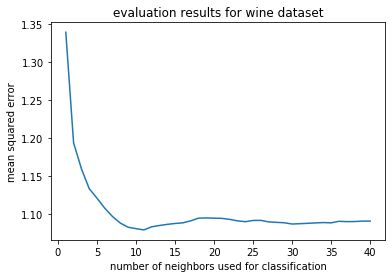

In [47]:
plt.title('evaluation results for wine dataset')
plt.plot(np.arange(1, 41), mses)
plt.xlabel('number of neighbors used for classification')
plt.ylabel('mean squared error')
plt.show()

_Looks like the best k to use is around 12._

## 6.2 Artificial Neural Networks

In this part of the exercise we will use neural networks to classify the xor data. We will consider a network with an input layer, one layer of hidden units and an output layer. The class `sklearn.neural_network.MLPClassifier` can be used to create a Multilayer Perceptron that can minimizes the Cross-Entropy loss function for any dataset X with corresponding labels y. See https://scikit-learn.org/stable/modules/neural_networks_supervised.html 

We use the data contained in `xor.mat` in the Data folder. 

#### 6.2.1 (0.5 points)
Check out the documentation for `MLPClassifier` and read the documentation well. Make sure you understand at least in general terms how the learning process works. Answer the following questions before you continue:

1. For a single perceptron, the activation function can be linear, e.g. $f(x) = x$. However, the activation function used in the MLP class is a non-linear function. Why does it not make sense for a MLP to use such a linear activation function? Hint: what does the following computation simplify to if $f(x)$ is such a simple linear function: $f(Wo*f(Wh*X_i))$?
2. The MLPClassifier has a few optional parameters. For each of the following parameters, explain how changing the parameter might affect the learning process or the resulting solution:

> `hidden_layer_sizes` :

> `max_iter`:

> `learning_rate`:

> `learning_rate_init`: 

   3\. Use the following commands to create a small test set:

> `Xtest = np.array([[0,0],[0,1],[1,0],[1,1]]).`

> `ytest = np.array([0,0,0,1])`
     

Create a MLPClassifier with 1 hidden layer using the `lbfgs`solver and fit the data. You can leave the other parameters unchanged. Use the score method to compute the mean accuracy. How well does the MLP perform on this problem? Use the function `MLPPlot.plot_boundaries` function to plot the data and the decision boundaries. Why does(n't) it work well with one hidden unit? Could you improve by using more?

#### NB: the weights are initialised randomly, so you should run the code a few times untill you get a decent result.

## Answers for 6.2.1 


1. The idea of a MLP is to gain the capability to learn non-linear models by adding non-linear activation functions. By suppresing this non-linear activations, and using only linear functions the whole MLP, no matter how many layers it has, becomes a single perceptron, i.e, if $f(x)$ is a simple linear function, then $f(Wo*f(Wh*X_i))$ is just another single linear combinantion of the inputs, and this can be extended to n more functions and the output will remain a linear combination of the inputs. 

2. The values of the hyperparameters in a MLP affects its performances. Next, we explain how some of this parameters affects the learning process of a MLP:

> `hidden_layer_sizes`: The more layers the deeper the network, the more features can be extracted from the data, but the more complex the network gets and thefore the more complex the training process becomes but in general it leads to better results. 

> `max_iter`: Increasing this parameter allows the algorithm to be trained more times, which means that the algorithms sees the data repeatidly, this in fact will help to reduce the loss but it can also lead to overfitting.

> `learning_rate`: Changing the learning rate modify the gradient values that are used during training using gradient descent. Using a low value in general allows to have a smooth convergence, but it can be very slow. However, using a big value can make the system inestable and never find convergence (global minima).

> `learning_rate_init`: the MLP objective is to minimize a function (luckily a convex one), therefore the initialization of the learning rate affects where in the weight spaces the learning procedure starts, which in some cases can lead to a local minima instead of a global minima. 

3. As it can be seen below (first Image), the MLP does not performe well. Although the mean accuracy is 1.0, most of the times the classifier just classfied everything as `0`. In contrast, in the next plot, where we add more layers, the classifier is more robust, after several runs, it always classified correctly each labels.

Mean Accuracy 1 hiddden layer: 1.0


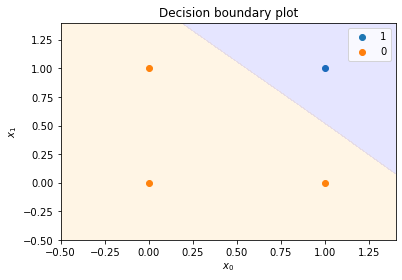

Mean Accuracy 10 hidden layers: 1.0


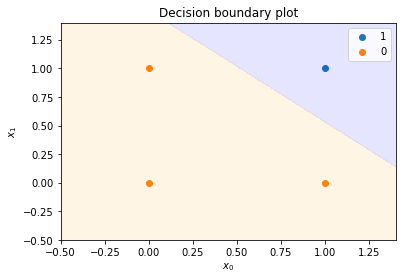

In [164]:
import Toolbox.MLPPlot 
from sklearn.neural_network import MLPClassifier

Xtest = np.array([[0,0],[0,1],[1,0],[1,1]])
ytest = np.array([0,0,0,1])

mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(1))
mlp.fit(Xtest,ytest)

print('Mean Accuracy 1 hiddden layer: {}'.format(mlp.score(Xtest,ytest)))

plotter = Toolbox.MLPPlot.MLPPlot(Xtest,ytest,mlp)
plotter.plot_boundaries()


mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(10))
mlp.fit(Xtest,ytest)

print('Mean Accuracy 10 hidden layers: {}'.format(mlp.score(Xtest,ytest)))

plotter = Toolbox.MLPPlot.MLPPlot(Xtest,ytest,mlp)
plotter.plot_boundaries()

#### 6.2.2 (0.5 points)
Load the data from `xor.mat` into Python using `scipio.io.loadmat(...)` and make `y` a 1d vector. Make a scatter plot of the two attributes in `X`, coloring the points according to the class labels `y`. How are `X` and `y` related?

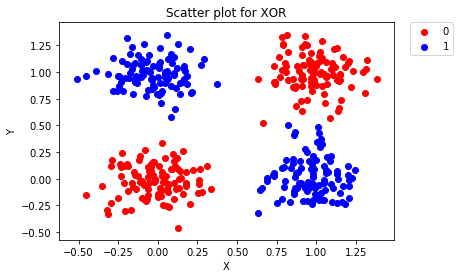

In [165]:
# Load the data
from scipy.io import loadmat
import matplotlib.pyplot as plt
import pandas as pd 

data = loadmat('Data/xor.mat')
X = data['X']
y = data['y'].ravel()

def clusterPlot(data, labels, data_name, colors=None):
    if None: colors = ['blue', 'purple', 'red', 'lime']
    x1 =data['X'][:,0]
    x2 =data['X'][:,1]
    for label in np.unique(labels):
        x = x1[labels == label]
        y = x2[labels == label]
        plt.scatter(x, y, c=colors[label])
    plt.legend(np.unique(labels), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Scatter plot for {data_name}')
    plt.show()
    
clusterPlot(data, data['y'].ravel(), 'XOR', colors=['r','b'])   

## Answer for 6.2.2 :

The data describe the XOR logic operation, therefore the values that has similar values around a a marging of +- 0.5 of deviation, are cluster in the class 0 ((0,0), (1,1)), while the values with oppositive correlation are clusters in class 1 ((0,1), (1,0))

#### 6.2.3 (2 points)
Create a MLPClassifier with 1 hidden unit. Fit X and y. Use 10-fold cross-validation `KFold` from `sklearn.model_selection` to create training and test sets and estimate the classification error for both. In each fold, run the learning process 5 times and take the best classification error.  

Plot the decision boundaries of one network trained on the entire data set, again with 1 hidden unit, and explain why the network performs so well/poorly.

Training Mean Accuracy : 0.8008333333333333
Testing Mean Accuracy: 0.695


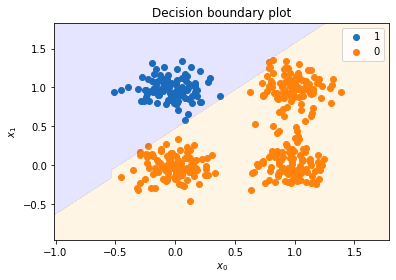

In [213]:
# MLP 1 hidden unit 10-fold cross-validation
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold

def mean(lst): 
    return sum(lst) / len(lst)   

def train_MLP(X, y, layers, k=10):
    mlp =  MLPClassifier(solver='lbfgs', hidden_layer_sizes=(layers))
    kf = KFold(n_splits=k, random_state=None, shuffle=False)

    train_errors = []
    val_errors = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        train_error = []
        val_error = []
        for i in range(5):
            mlp.fit(X_train, y_train)
            train_error.append(mlp.score(X_train,y_train))
            val_error.append(mlp.score(X_test,y_test))
        train_errors.append(max(train_error))
        val_errors.append(max(val_error))


    print('Training Mean Accuracy : {}'.format(mean(train_errors)))
    print('Testing Mean Accuracy: {}'.format(mean(val_errors)))

    mlp.fit(X,y)
    plotter = Toolbox.MLPPlot.MLPPlot(X,y,mlp)
    plotter.plot_boundaries()
    
train_MLP(X, y, layers=1, k=10)

## Answer for 6.2.3 

The capacity of the network only allows to capture one non-linearity characteristic of the data, in this case only separates one group from class 1 from the rest of the data. Therefore, we need to add more non-linearities to captures this model.

#### 6.2.4 
Repeat 6.2.3, but use two hidden units instead of one. Does the classification performance improve? Can you explain why?

Training Mean Accuracy : 0.9666666666666666
Testing Mean Accuracy: 0.99


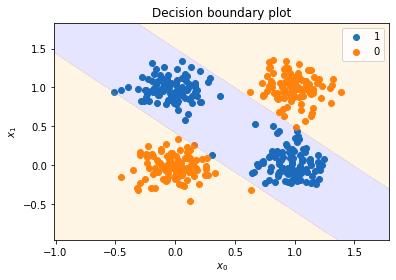

In [214]:
train_MLP(X, y, layers=2, k=10)

## Answer for 6.2.4 :

It improved a lot!. It is amazing how use by adding one more layer, the network is able to capture almost both complete groups.

#### 6.2.5
Repeat 6.2.3 with 10 hidden units. What happens to the decision boundaries of the learned neural networks? What are the benefits and drawbacks of including
many hidden units in the network?

Training Mean Accuracy : 1.0
Testing Mean Accuracy: 0.9974999999999999


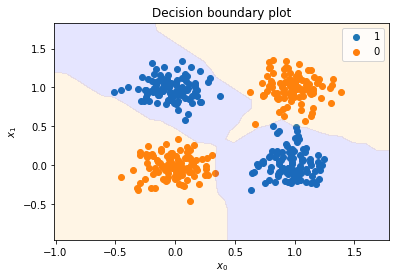

In [215]:
train_MLP(X, y, layers=10, k=10)

## Answer for 6.2.5 :

With 2 layers we got good results, however using 10 layers we can see how the boundaries are clearly separating the cluster, avoiding any misclasification. This is good but it can also lead to overfitting if we keep adding more layers, as the boundaries will be biassed towards the training data and won't be able to generalize for new data.